# Theorische vragen Deep Learning

Sabine De Vreese, Stijn Lievens en Simon De Gheselle

11 oktober 2025

## Inleiding
Hieronder vind je een vragenlijst die je kan helpen bij het studeren voor het theorie-examen van het opleidingsonderdeel Deep Learning. Veel vragen op het theorie-examen zullen gebaseerd zijn op de lijst van onderstaande vragen. Het is dus een goed idee als je minstens deze vragen kan beant-woorden op het moment dat je het examen aflegt.

## Hoofdstuk 16: Natuurlijke Taalverwerking met RNNs en “attention”

1. (Oefening 2 uit het boek) Leg uit waarom encoder-decoder RNNs worden gebruikt i.p.v. sequentie-naar-sequentie RNNs voor het automatisch vertalen van tekst.
    > Encoder-Decoder RNN laat toe om volledige context van de inputzin te verwerken (S2V) en daarna de vertaling te beginnen via (V2S) in de decoder.
2. (Oefening 3 uit het boek) Hoe kunnen RNNs gebruikt worden met input-sequenties van verschillende lengte? Hoe worden uitvoersequenties van variabele lengte behandeld?
    > Input even lang maken kan via padding en/of masking
    > Output kan een stopteken toevoegen zoals <eos>

3. (Oefening 4 uit het boek) Wat is “beam search” en waarom zou je hetgebruiken.
    > Beam search is een zoekalgoritme, gebruikt voor kwaliteit van vertalingen te verbeten. Houdt k (beam width) meest vaarschijnlijke sequenties bij. Zo kunnen meerdere padden overlopen worden

4. (Oefening 6 uit het boek) Wat is de belangrijkste laag in de “transformer”-architectuur? Wat is het doel van deze laag
    > Belangrijkste laag van de transformer, is de self-attention in de encoder. De multi-head self-attention geeft betekenis aan de woorden gebaseerd op de volledige context
    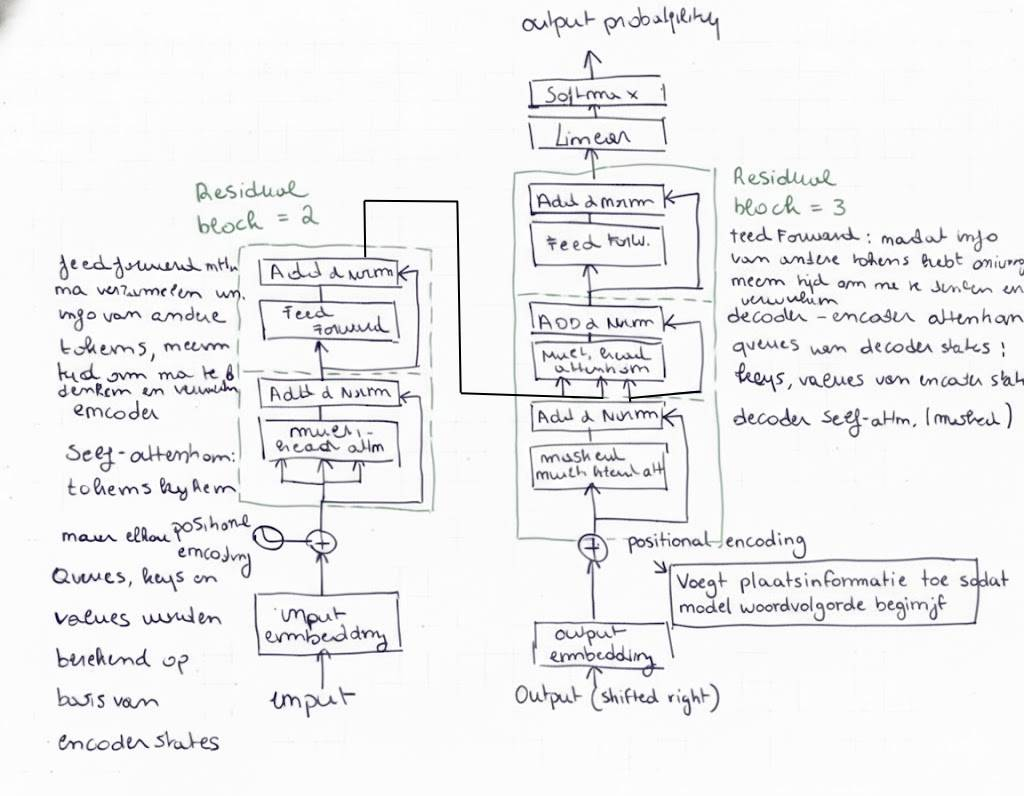

5. Beschouw “dot-product attention” (i.e. “attention” gebaseerd op het in-wendig product). Voor de eenvoud nemen weg een schalingsfactor mee in de berekening. Anders gezegd, de uitvoer van de attentielaag is:
    $$
    Attention(Q,K,V) =softmax(Q^TK)V
    $$
    waarbij de softmax werkt over iedere rij van zijn argument.
    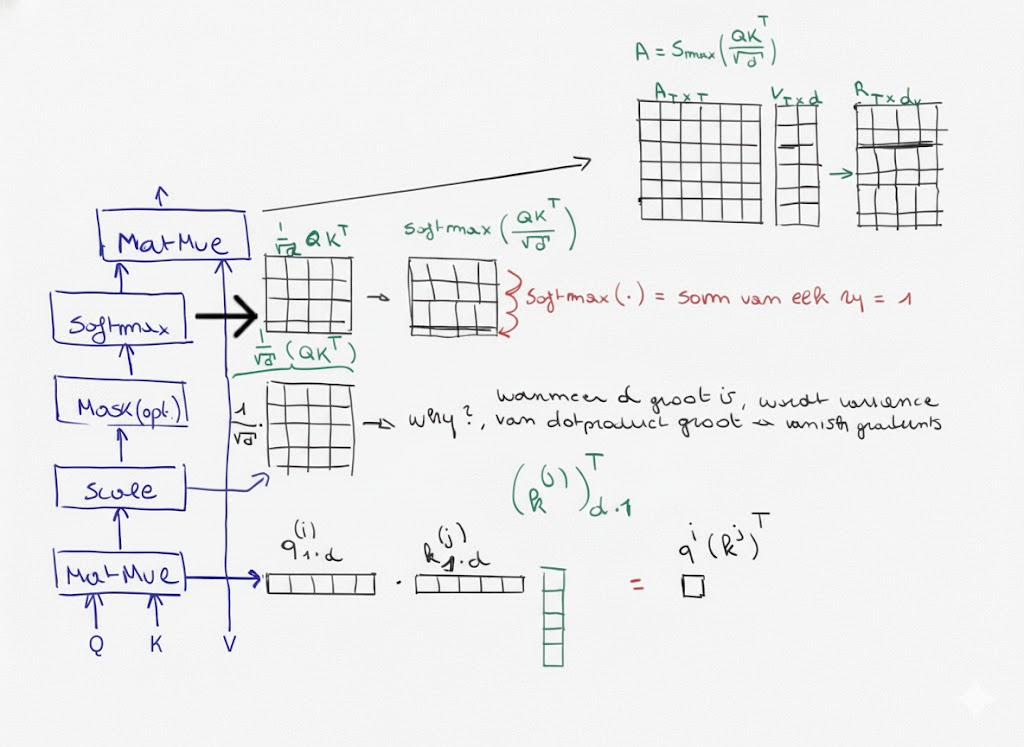
    Veronderstel dat we beschikken over een sequentie van lengte $3$ en dat de dimensie van de “embedding” gelijk is aan $4$. De “embeddings” worden gegeven door:
    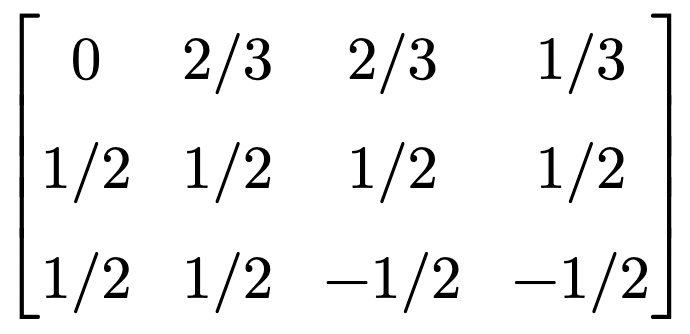
    Pas “self-attention” toe op deze sequentie. Wat is de uitvoer van het “attention” mechanisme. Toon je berekeningen.

    **Stap 1: Bepaal matrices $(Q,K,V)$**
    Van uitgaan dat de Embedding matrix (X), direct gebruikt wordt voor alle drie:
    - Q = X
    - K = X
    - V = X

    **Stap 2: Bereken het Dot-Product $(QK^T)$**
    - Vermenigvuldig de matrix met zijn eigen <ins>getransponeerde</ins> versie
    - $3\times 3$ matrix (sequentielengte is 3)

        Matrix X (is Q,K en V):
    $$
    X = \begin{bmatrix} 0 & 2/3 & 2/3 & 1/3 \\ 1/2 & 1/2 & 1/2 & 1/2 \\ 1/2 & 1/2 & -1/2 & -1/2 
    \end{bmatrix}
    \\[1em]

    K^T \rightarrow \text{de rijen van X zijn:}\\
    \begin{aligned}
    \text{rij 1: } & (0,\; 2/3,\; 2/3,\; 1/3) \\
    \text{rij 2: } & (1/2,\; 1/2,\; 1/2,\; 1/2) \\
    \text{rij 3: } & (1/2,\; 1/2,\; -1/2,\; -1/2)
    \end{aligned}
    \\[1em]
    \text{Die worden nu kolommen in } K^T:\\
    K^T \text{ of } (X^T) = \begin{bmatrix} 0 & 1/2 & 1/2 \\ 2/3 & 1/2 & 1/2 \\ 2/3 & 1/2 & -1/2 \\ 1/3 & 1/2 & -1/2 \end{bmatrix}
    $$
    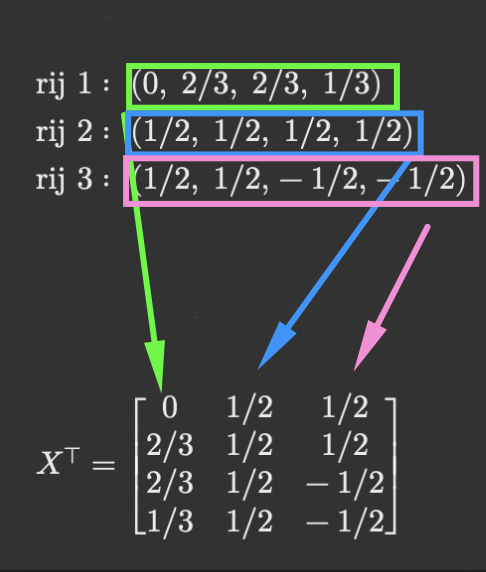
    $$
    
    \text{matrixvermenigvuldiging}\;Q \cdot K^T\\

    $$
    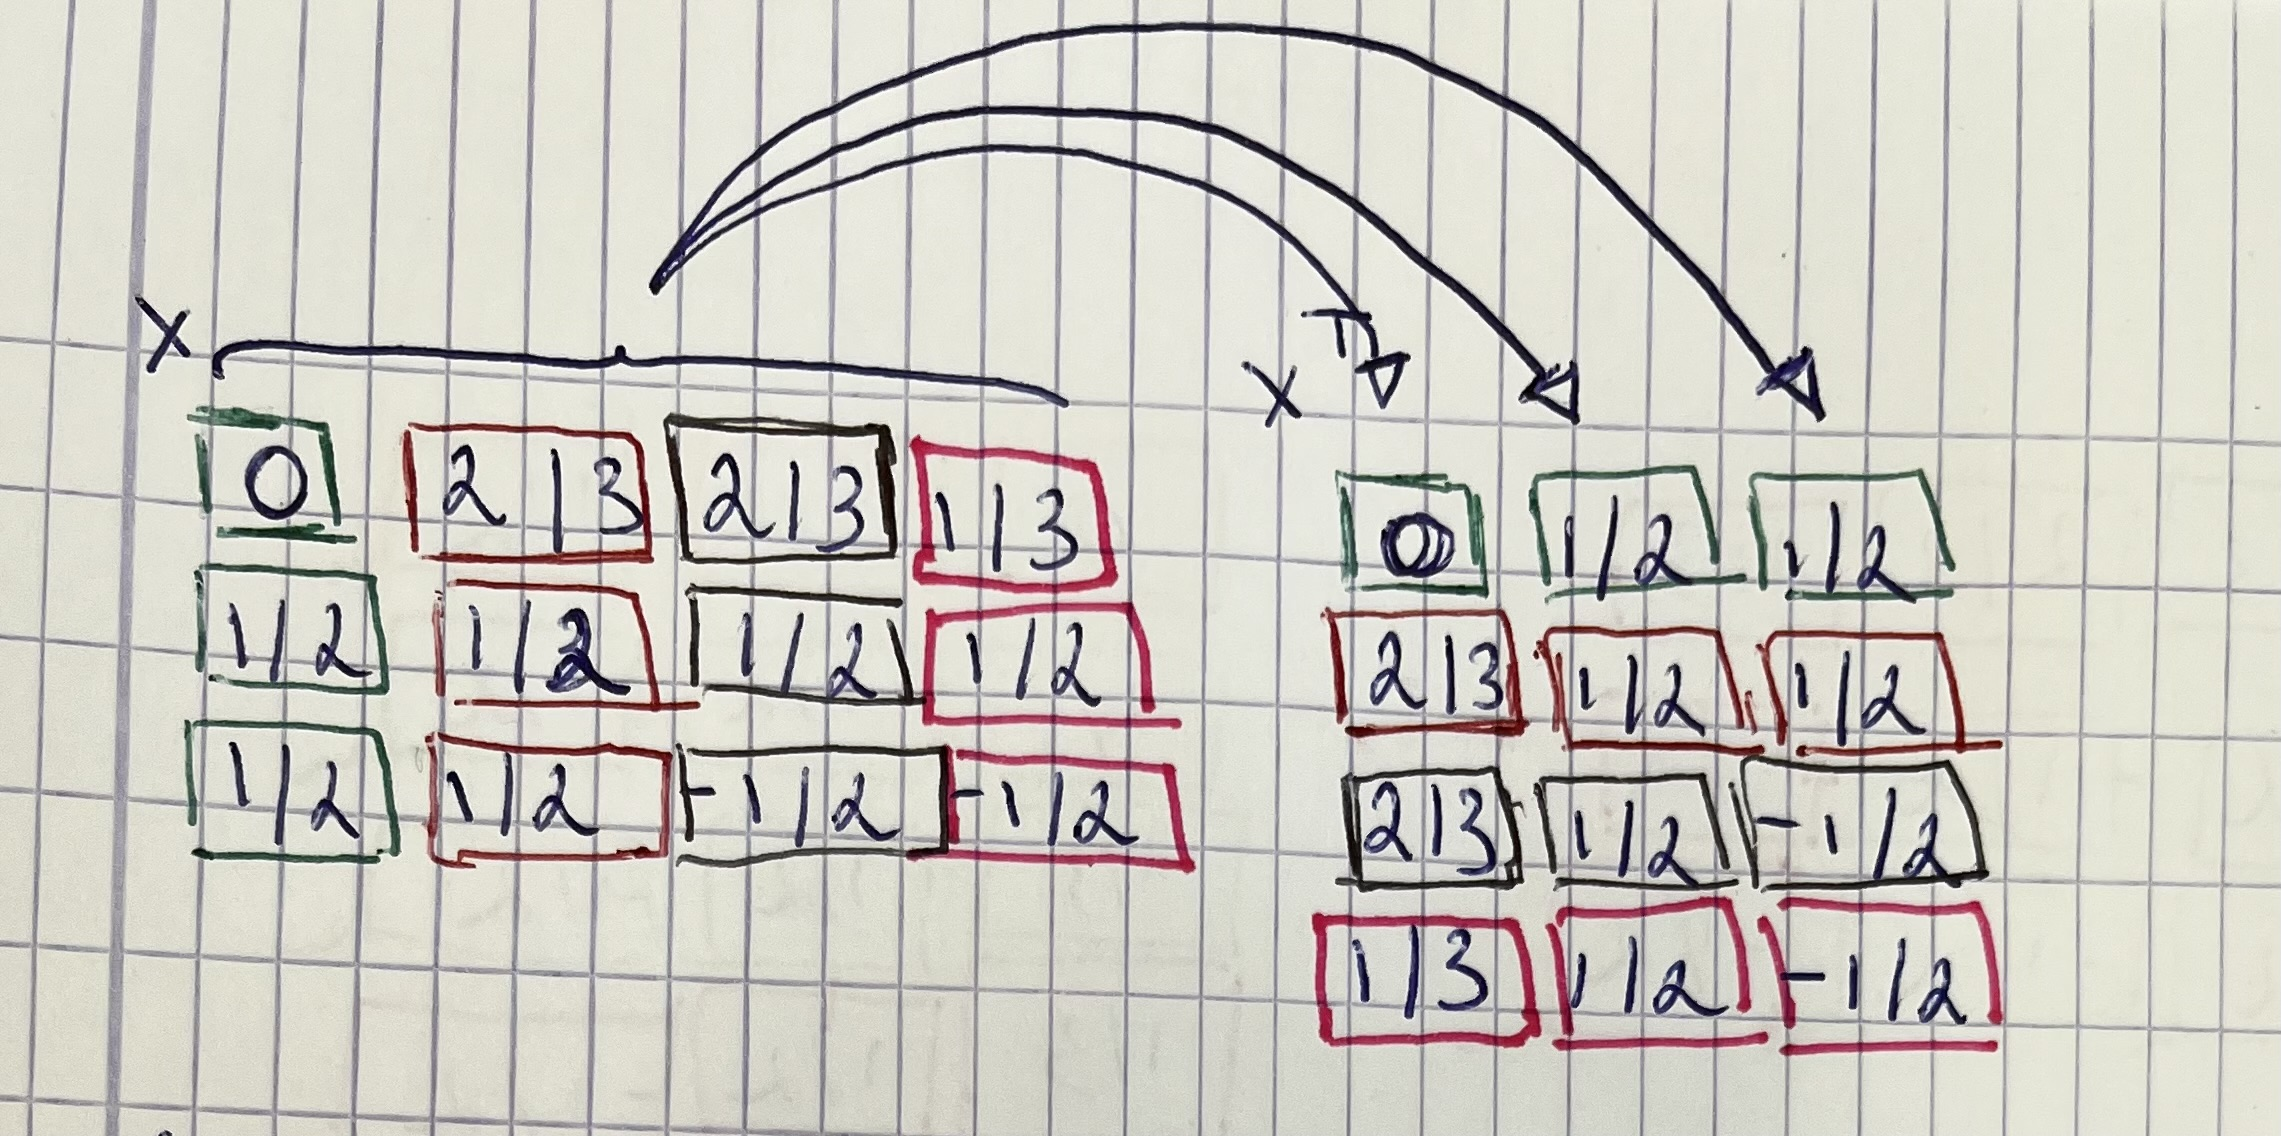
    (1,1) $X$ Rij 1 $X^T$ Kolom 1: $(0*0)+(2/3*2/3) + (2/3*2/3) +(1/3*1/3) = \underline{1}$

    (1,2) $X$ Rij 1 $X^T$ Kolom 2: $(0*1/2) + (2/3*1/2) + (2/3*1/2) + (1/3*1/2)= \underline{0.83}$

    (1,3) $X$ Rij 1 $X^T$ Kolom 3: $(0*1/2) + (2/3*1/2) + (2/3*-1/2) + (1/3*-1/2)=\underline{-1.66}$
    $$
    \begin{bmatrix}
    1 & 0.83 & -1.66\\
    \_ & \_ & \_\\
    \_ & \_ & \_\\
    \end{bmatrix}
    $$
    (2,1) $X$ Rij 2 $X^T$ Kolom 1: $(1/2*0)+(1/2*2/3) + (1/2*2/3) +(1/2*1/3) = \underline{0.83}$

    (2,2) $X$ Rij 2 $X^T$ Kolom 2: $(1/2*1/2) + (1/2*1/2) + (1/2*1/2) + (1/2*1/2)= \underline{1}$

    (2,3) $X$ Rij 2 $X^T$ Kolom 3: $(1/2*1/2) + (1/2*1/2) + (1/2*-1/2) + (1/2*-1/2) =\underline{0}$
    $$
    \begin{bmatrix}
    1 & 0.83 & -1.66\\
    0.83 & 1 & 0\\
    \_ & \_ & \_\\
    \end{bmatrix}
    $$
    (3,1) $X$ Rij 2 $X^T$ Kolom 1: $(1/2*0)+(1/2*2/3) + (-1/2*2/3) +(-1/2*1/3) = \underline{-1.66}$

    (3,2) $X$ Rij 2 $X^T$ Kolom 2: $(1/2*1/2) + (1/2*1/2) + (-1/2*1/2) + (-1/2*1/2)= \underline{0}$

    (3,3) $X$ Rij 2 $X^T$ Kolom 3: $(1/2*1/2) + (1/2*1/2) + (-1/2*-1/2) + (-1/2*-1/2) =\underline{1}$
    $$
    \begin{bmatrix}
    1 & 0.83 & -1.66\\
    0.83 & 1 & 0\\
    -1.66 & 0 & 1\\
    \end{bmatrix}
    $$

    **Stap 3: Scaling**
    Formule $\frac{1}{\sqrt{d}}(QK^T)$
    - De dimensie $(d_k)$ van de embeddings
    - Elk getal uit $3\times3$ matrix delen door $\sqrt{4} = 2$

    **Stap 4: Softmax**
    Pas de softmax toe op elke rij van matrix
    - De formule vaan een getal z in een rij is: $\sigma(z)_i = \frac{e^{z_i}}{\sum e^{z_j}}$
    - Scores om in gewichten (percentages)

    **Stap 5: Finale berekening**
    Nieuwe $3\times3$ (Attention weight) matrix vermenigvulden met matrix $V$
    - Resultaat is <ins>Attention output</ins>
    - Een $3\times4$ matrix (3 tokens, elk met nieuwe embedding van dimensie 4)


